# DA_HW05 R09546035 李冠德

# Q1

Since covariance matrix is nuknown, i use hotelling's T-square test.

HO: the mean vectors of the two populations are equal

H1: the mean vectors of the two populations are not equal

H0 is reject if T_square > T_square(alpha = 0.05)

T_Square = 255.15600184279617

Since T_Square > T_square(alpha = 0.05), so reject H0 at alpha = 0.05

Have enough evidence to show that the mean vectors of the two populations are not equal

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
turtles = pd.read_csv(r'C:/Users/x5134/Desktop/HW05/painted_turtles.txt')
turtles = np.log(turtles) # log transformation
x_female = turtles[['x1', 'x2', 'x3']]
x_female.columns = range(x_female.shape[1])
x_male = turtles[['x4', 'x5', 'x6']]
x_male.columns = range(x_male.shape[1])

In [2]:
# since covariance matrix is nuknown, i use hotelling's T-square test. 
# HO: the mean vectors of the two populations are equal
# H1: the mean vectors of the two populations are not equal
# H0 is reject if T_square > T_square(alpha = 0.05, p = 3, n = 144 - 1)

f_mean = pd.DataFrame(x_female.mean())
m_mean = pd.DataFrame(x_male.mean())
f_cov = pd.DataFrame(x_female.cov())
m_cov = pd.DataFrame(x_male.cov())

A = (f_mean - m_mean)
B = ((1/x_female.size) * f_cov + (1/x_male.size) * m_cov)
B_inv = pd.DataFrame(np.linalg.pinv(B.values), B.columns, B.index)
T_Square = A.T.dot(B_inv).dot(A).at[0,0]
print('T_Square =', T_Square)

# Since T_Square > T_square(alpha = 0.05), so reject H0 at alpha = 0.05
# Have enough evidence to show that the mean vectors of the two populations are not equal

T_Square = 255.15600184279617


# Q2-(a)

(LASSO) when lambda = 0.0 have minimum MSE = 5.8600629423822835e-08

(RIDGE) when lambda = 0.0 have minimum MSE = 1.5970242507166503e-29

stepwise regression MSE = 1.1125225869917036e-05

LASSO and Ridge are better than stepwise regression

In [3]:
import cv2
import os
import pandas as pd 

# import female data
image = os.listdir(r'C:/Users/x5134/Desktop/Datasets/ORL_Faces/female') # 讀取檔案資料
img_female = []
for i in range(len(image)):
    os.chdir(r'C:/Users/x5134/Desktop/Datasets/ORL_Faces/female') # 鎖定檔案
    img = cv2.imread(image[i], cv2.IMREAD_GRAYSCALE)          # 讀取圖檔
    irow = img.ravel()                                        # 轉為1維陣列 
    img_female += [irow]                                      # 將所有圖片一維陣列儲存在一個集合    
female = pd.DataFrame(img_female)                             # 輸出成資料框並命名
female['label'] = 0                                           # add label

# import male data
image = os.listdir(r'C:/Users/x5134/Desktop/Datasets/ORL_Faces/male') # 讀取檔案資料
img_male = []
for i in range(len(image)):
    os.chdir(r'C:/Users/x5134/Desktop/Datasets/ORL_Faces/male')   # 鎖定檔案
    img = cv2.imread(image[i], cv2.IMREAD_GRAYSCALE)          # 讀取圖檔
    irow = img.ravel()                                        # 轉為1維陣列
    img_male += [irow]                                        # 將所有圖片一維陣列儲存在一個集合
male = pd.DataFrame(img_male)                                 # 輸出成資料框並命名
male['label'] = 1                                             # add label

# concat two data
total = pd.concat([female,male], axis = 0, join = 'inner') # concat female and male data
total.index = range(0,400)                                 # rename index
total = (total.drop(['label'], axis = 1))                  # drop label, let shape become (400, 2576)

total_labels = pd.concat([female['label'], male['label']], axis = 0,join = 'inner') # concat label
total_labels.index = range(0,400)

(LASSO) when lambda = 0.0 have minimum MSE = 5.8600629423822835e-08


Text(0, 0.5, 'MSE')

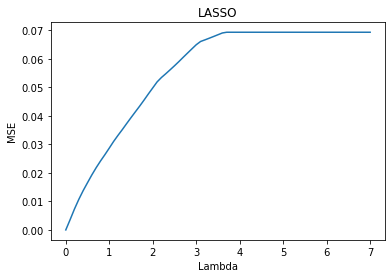

In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# using Lasso to find best lambda

X = total
y = total_labels

minMSE = float('inf')                 # 先設 minMSE 為極大值
lambda_list = np.arange(0, 7.1, 0.1)  # 候選 Lambda
mse_list = []

for i in lambda_list:

    reg_lasso = linear_model.Lasso(alpha=i)
    reg_lasso.fit(X, y)
    y_predict = reg_lasso.predict(X).tolist()

    mse = mean_squared_error(y, y_predict)
    mse_list.append(mse)

    if mse < minMSE:
        minMSE = mse
        bestLambda = i

print('(LASSO) when lambda =', bestLambda, 'have minimum MSE =', minMSE)
plt.plot(lambda_list, mse_list)
plt.title("LASSO")
plt.xlabel('Lambda')
plt.ylabel('MSE')

(RIDGE) when lambda = 0.0 have minimum MSE = 1.5970242507166503e-29


Text(0, 0.5, 'MSE')

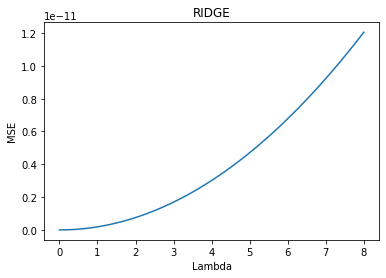

In [5]:
# using ridge to find best lambda

X = total
y = total_labels

minMSE = float('inf')                  # 先設 minMSE 為極大值
lambda_list = np.arange(0, 8.1, 0.1)   # 候選 Lambda
mse_list = []

for i in lambda_list:

    reg_lasso = linear_model.Ridge(alpha=i)
    reg_lasso.fit(X, y)
    y_predict = reg_lasso.predict(X).tolist()

    mse = mean_squared_error(y, y_predict)
    mse_list.append(mse)

    if mse < minMSE:
        minMSE = mse
        bestLambda = i

print('(RIDGE) when lambda =', bestLambda, 'have minimum MSE =', minMSE)
plt.plot(lambda_list, mse_list)
plt.title('RIDGE')
plt.xlabel('Lambda')
plt.ylabel('MSE')

In [6]:
from sklearn.linear_model import LinearRegression

# the stepwise regression at HW03 (there are 392 important pixel)
facepixel = pd.read_excel(r'C:/Users/x5134/Desktop/HW05/facePixel.xlsx', names = list(range(8)))
facepixel = facepixel.values.tolist()

# 轉成一維
pixel = []
for i in range(len(facepixel)):
    pixel += facepixel[i]

# 紀錄 important pixel 的 data
X = pd.DataFrame([[0]*2576]*400)
for i in pixel:
    X[i] = total[i]

# start training 
model = LinearRegression()
model.fit(X, total_labels)
y_predict_sr = model.predict(X).tolist()
print('stepwise regression MSE =', mean_squared_error(y, y_predict_sr))

stepwise regression MSE = 1.1125225869917036e-05


# Q2-(b)

478 pixel be chosen


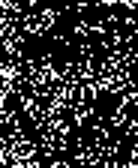

In [7]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

X, y = total, total_labels

# only have one lambda and lambda value are set automatically.
lsvc = LassoCV(n_alphas=1).fit(X, y)
model = SelectFromModel(lsvc)
model.fit(X, y)

# check which pixel be selected
model.get_support()

# record selected pixel's index
pixel_selected = []
for i in range(2576):
    if model.get_support()[i] == True:
        pixel_selected.append(i)

print(len(pixel_selected), 'pixel be chosen')

# let important pixel to be white
pixel = [0] * 2576
for i in pixel_selected:
    pixel[i] = 255

# plot the chosen pixel on a 46x56 canvas
from PIL import Image
pic = np.array(pixel, dtype = 'uint8').reshape(56,46)
img = Image.fromarray(pic, 'L')
img = img.resize((138, 168))
img


# Q3-(a)

bata1 = 0.5056509223985458

bata2 = 0.8454644447654768

In [8]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import random
import math

# 對目標式取對數 => log(Vt) = log(alpha) + beta1*log(Kt) + beta2*log(Lt) + log(Eta_t)
bank = pd.read_csv(r'C:/Users/x5134/Desktop/HW05/Bank.txt')
log_bank = np.log(bank) # log transformation
X = log_bank[['Capital','Labor']]
y = log_bank['Value_Added']

model = LinearRegression()
model.fit(X, y)
print('bata1 =', model.coef_[0])
print('bata2 =', model.coef_[1])


bata1 = 0.5056509223985458
bata2 = 0.8454644447654768


# Q3-(b)

bata1 = 0.009608932223409696

bata2 = 0.9903910677765903

In [9]:
# if beta1 + beta2 = 1
# 目標式可改寫成: log(Vt) = log(alpha) + beta1*log(Kt) + (1-beta1)*log(Lt)
# => log(Vt) = log(alpha) + bata1*log(Kt) + log(Lt) - beta1*log(Lt)
# => log(Vt) - log(Lt) = log(alpha) + beta1*( log(Kt)-log(Lt) )
# 可以把 log(Vt) - log(Lt) 看成應變數， log(Kt)-log(Lt) 看成自變數

X = pd.DataFrame(log_bank['Capital'] - log_bank['Labor'])
y = log_bank['Value_Added'] - log_bank['Labor']

model = LinearRegression()
model.fit(X, y)

print('bata1 =', model.coef_[0])
print('bata2 =', (1 - model.coef_[0]))

bata1 = 0.009608932223409696
bata2 = 0.9903910677765903


# Q4-(a)

In [10]:
from numpy import linalg as LA
import matplotlib.pyplot as plt
from PIL import Image 

def PCA(X, isCorrMX, show_details = True, draw_face = False):

    # using corr matrix or cov matrix
    Z = X-X.mean()
    if isCorrMX == True:
        S = Z.corr()
    else:
        S = Z.cov()

    # calculate eigenvalues and eigenvectors
    eigen_values, eigen_vectors = LA.eig(S)
    if show_details == True:
        print('eigen_values =', '\n', eigen_values)
        print()
        print('eigen_vectors =', '\n', eigen_vectors)
        print()

    # calculate T = XP
    T = X.dot(eigen_vectors)
    X_inv = pd.DataFrame(LA.pinv(X.values), X.columns, X.index)
    P = X_inv.dot(T)
    if show_details == True:
        print('score matrix (head) =', '\n', T.head())
        print()
        print('Loading matrix =', '\n', P)
        print()

    eigen_values = list(eigen_values)
    eigen_vectors = list(eigen_vectors)

    # for Q5-(b)
    if draw_face == True:

        # find first PC
        first_PC = X.dot(eigen_vectors[eigen_values.index(max(eigen_values))])

        # change t0 [0, 255]
        old_value =  first_PC
        old_min = min(first_PC)
        old_max = max(first_PC)
        new_first_PC = ( ( old_value - old_min ) / (old_max - old_min) ) * (255 - 0) + 0

        # draw
        pic = np.array(new_first_PC, dtype='uint8').reshape(56,46) #畫在圖上 白點為特徵
        img = Image.fromarray(pic, 'L')
        img = img.resize((138, 168))

        return img
       
    else:   
        # sort eigenvalue
        eigen_values.sort(reverse=True)
        eigenvalues_totals = sum(eigen_values)
        eigen_values = pd.Series(eigen_values)

        # calculate explainable ratio of each pricipal components
        cumulative_list = []
        cumulative_ratio = 0
        for i in range(eigen_values.shape[0]):
            ratio = eigen_values[i] / eigenvalues_totals
            cumulative_ratio += ratio
            cumulative_list.append(cumulative_ratio)

        # to show how many principal components are needed to explain variance
        record = 0 # 防止重複進入迴圈
        for i in range(len(cumulative_list)):
            if cumulative_list[i] >= 0.9 and record <= 4:
                record += 1
                print(str(i + 1), 'principal components are needed to explain 90% the total variance')
                break
            elif cumulative_list[i] >= 0.8 and record <= 3:
                record += 1
                print(str(i + 1), 'principal components are needed to explain 80% the total variance')

            elif cumulative_list[i] >= 0.7 and record <= 2:
                record += 1
                print(str(i + 1), 'principal components are needed to explain 70% the total variance')

            elif cumulative_list[i] >= 0.6 and record <= 1:
                record += 1
                print(str(i + 1), 'principal components are needed to explain 60% the total variance')  

            elif cumulative_list[i] >= 0.5 and record == 0:
                record += 1
                print(str(i + 1), 'principal components are needed to explain 50% the total variance')  

        # draw the scree plot 
        fig, ax2 = plt.subplots()
        plt.title('Scree Plot')
        plt.xlabel('Principal Component')
        ax1 = ax2.twinx()

        # cumulative variance explained is drawn as a line
        ax1.set_ylabel('Cumulative Percentage', color='blue')
        ax1.plot(range(1, len(cumulative_list)+1), cumulative_list, 'ro-',color='blue', alpha=0.75)
        ax1.set_ylim([0, 1.05])
        ax1.tick_params(axis='y', labelcolor='blue')

        # eigenvalues are shown as bars
        ax2.set_ylabel('Variance', color='seagreen')
        ax2.bar(range(1, len(eigen_values)+1), eigen_values, color='seagreen', alpha=1)
        ax2.tick_params(axis='y', labelcolor='seagreen')

# Q4-(b)

PCA is not scale-invariant。 因為 x 只有減掉 x-bar，沒有做標準化，所以會被 scale 影響。

In [15]:
# loading data
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
df = pd.read_table(r'C:/Users/x5134/Desktop/Datasets/auto-mpg.data.txt', delim_whitespace=True, names=columns)

# Tidy data ( 因為 "horsepower == ?"" 的資料不多, 因此選擇直接忽視 )
df = df[df.horsepower != '?']
df.horsepower =df.horsepower.astype('float')
auto_mpg = df.drop(['mpg', 'car name'], axis=1)

eigen_values = 
 [7.32151674e+05 1.51397202e+03 2.61244860e+02 1.09726327e+01
 2.87874868e+00 2.64153387e-01 3.78992691e-01]

eigen_vectors = 
 [[ 1.79262233e-03 -1.33244815e-02 -7.29209804e-03  1.42837791e-03
  -1.71683641e-02 -9.58096063e-01  2.85519196e-01]
 [ 1.14341275e-01 -9.45778439e-01 -3.03257047e-01 -9.20994584e-03
   1.06092977e-02  1.61707371e-02  2.34681580e-03]
 [ 3.89670355e-02 -2.98248416e-01  9.48713803e-01 -4.30779415e-02
   8.64404757e-02 -7.42175636e-03 -9.42467988e-03]
 [ 9.92673415e-01  1.20752748e-01 -2.45320521e-03  1.48633490e-03
  -3.15267236e-03  2.91024612e-04  1.19678424e-04]
 [-1.35283460e-03  3.48258394e-02 -7.70032425e-02  5.95372077e-02
   9.94496232e-01 -1.66762346e-02  3.20939275e-03]
 [-1.33684138e-03  2.38516836e-02 -4.28162289e-02 -9.97249604e-01
   5.55064333e-02 -2.75161323e-03 -8.78813785e-04]
 [-5.51538021e-04  3.24298106e-03  1.24643867e-02 -1.94075866e-03
   2.65997449e-03  2.85393774e-01  9.58317990e-01]]

score matrix (head) = 
            

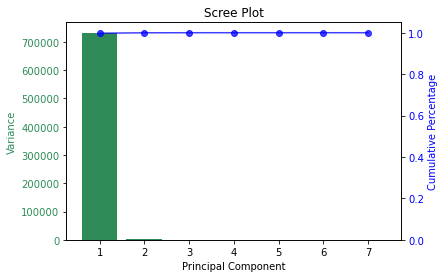

In [16]:
# start training
PCA(auto_mpg, isCorrMX = False)

eigen_values = 
 [4.61205914 0.94003231 0.7441651  0.4813097  0.12956905 0.0337052
 0.05915951]

eigen_vectors = 
 [[ 0.43811814  0.12021354 -0.02552952 -0.24087119 -0.70016012  0.45469472
  -0.19483078]
 [ 0.45336563  0.10744276 -0.02219632 -0.15933085 -0.17628654 -0.84964741
  -0.06371028]
 [ 0.43755745 -0.14243991 -0.17850576 -0.12458174  0.57939323  0.16928806
  -0.61360775]
 [ 0.43194636  0.20277538  0.01259408 -0.33522884  0.34853612  0.19327408
   0.70776776]
 [-0.29770757  0.48218575  0.55906361 -0.52733279  0.12091625 -0.01838595
  -0.270696  ]
 [-0.21473281  0.6424978  -0.73184478 -0.02888161  0.02423084 -0.00909099
  -0.06313227]
 [-0.29956291 -0.51700218 -0.34450506 -0.71399002 -0.07947985 -0.07012841
   0.05718642]]

score matrix (head) = 
              0           1          2            3            4           5  \
0  1694.207370  776.198455 -30.959471 -1250.742712  1239.938124  441.108506   
1  1810.803319  813.916551 -36.060865 -1325.048883  1318.449435  447.036744   

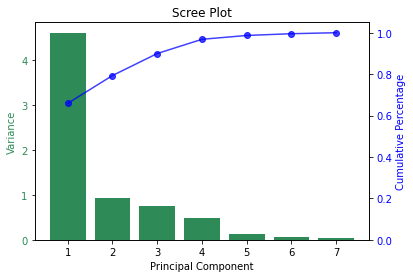

In [17]:
PCA(auto_mpg, isCorrMX = True)

# Q5-(a)

2 principal components are needed to explain 50% the total variance
3 principal components are needed to explain 60% the total variance
6 principal components are needed to explain 70% the total variance
15 principal components are needed to explain 80% the total variance
47 principal components are needed to explain 90% the total variance


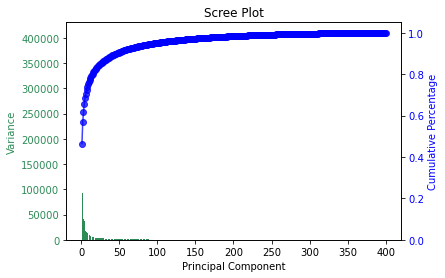

In [19]:
X = total.T
PCA(X, isCorrMX = False, show_details = False)

2 principal components are needed to explain 50% the total variance
4 principal components are needed to explain 60% the total variance
7 principal components are needed to explain 70% the total variance
17 principal components are needed to explain 80% the total variance
50 principal components are needed to explain 90% the total variance


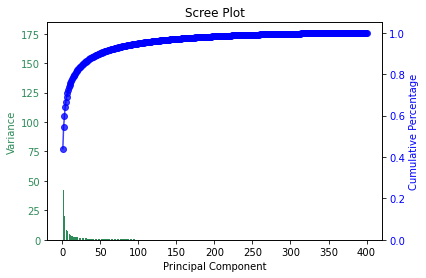

In [18]:
PCA(X, isCorrMX = True, show_details = False)

# Q5-(b)

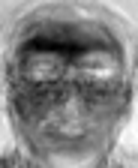

In [13]:
PCA(X, isCorrMX = False, show_details = False, draw_face = True)

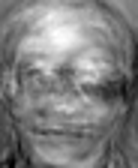

In [14]:
PCA(X, isCorrMX = True, show_details = False, draw_face = True)